In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [32]:
from sklearn import datasets

In [33]:
iris = datasets.load_iris()

In [34]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [35]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [36]:
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [37]:
iris.data.shape

(150, 4)

In [38]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [39]:
np.unique(iris.target)

array([0, 1, 2])

In [40]:
idx = iris.target != 2
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

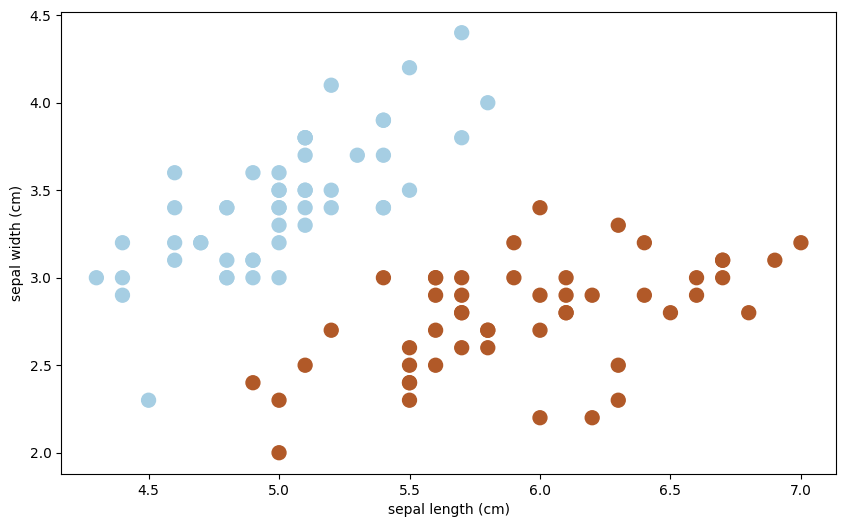

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.Paired, s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [42]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [43]:
data=pd.DataFrame({'sepal length':iris.data[:,0],'sepal width':iris.data[:,1],'petal length':iris.data[:,2],'petal width':iris.data[:,3],'species':iris.target})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
X = data[['sepal length','sepal width','petal length','petal width']]
y = data['species']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
trees = DecisionTreeClassifier(criterion="entropy",max_depth = 3,random_state = 42)

In [49]:
trees.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [50]:
trees.predict(X_test)

array([0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2,
       1])

In [51]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(trees,out_file = None,
                                feature_names = ['sepal_length','sepal_width','petal_length','petal_width'],
                                class_names="species",filled = True)

In [52]:
graph = graphviz.Source(dot_data,format = "png")

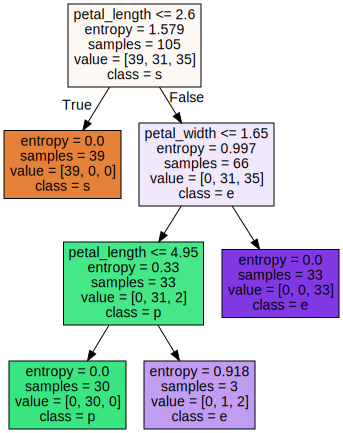

In [53]:
graph